# INTRODUCTION

This case study is aimed to understand the user data in our e-commerce based on different variables such as the time spent on our website and app as well as the amount spent. We firstly perform an exploratory data analysis to understand better the types of data we have as well as the distribution and then we will perform a K-Means clustering analysis to segment our user data into different clusters for future marketing activities.


Title: **Ecommerce Customer Classification**

Author: GreyHub

Date: 10 December 2023

***


# STEP 1: ASK

#### 1.0 Background

The data is retrieved from Kaggle, therefore we do not have a business backround. This dataset contains data of customers from a ecommerce platform that is available both on website as well as an app.

#### 1.2 Business Task:

Analyze the dataframe, understand the types of data we have, represent them graphically and cluster the different types of customers for further business decisions and actions.

#### 1.3 Business Objectives:  
1. What are the trends identified?
2. How could these trends apply to our ecommerce?
3. What are the main clusters and what could be key actions to penetrate them?



#### 1.4 Deliverables:
1. A clear summary of the data
2. A description of all data used
3. Supporting visualizations and key findings
4. Creation of different customer's clusters
5. High-level content recommendations based on the analysis


#### 1.5 Key Stakeholders:
1. Busienss Analysts
2. E-Commerce Managers


***


# STEP 2: PREPARE


#### 2.1 Information on Data Source:
1. The data has been downloaded from Kaggle, https://www.kaggle.com/datasets/iabdulw/ecommerce-customer-data. 
2. The data conains information about each single customer present in our database with email, address, time spent on both website and app and tealy amount spent. 

    
#### 2.2 Limitations of Data Set:
1. We do not have enough information about how the data is collected, plus is for training use and it's on public domain.



# STEP 3: PROCESS

We are using Python and Jupiter notebook to prepare and process the data.


#### 3.1 Preparing the Environment

For this analysis we use the main python libraries for data analysis such as ```numPy, pandas, matplotlib and seaborn```. For our machine learning classification analysis we then import Sklearn libraries such as ```KMeans, silhouette_score and davies_bouldin_score```

In [90]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import random


import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

In [91]:
df = pd.read_csv('customer_data.csv')

#### 3.3 Data cleaning and manipulation

##### Steps

1. Observe and familiarize with data

2. Check for null or missing values

3. Perform sanity check of data

In [92]:
df.head()

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   	Email                500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.5+ KB


In [94]:
# Rename the email column

df = df.rename(columns={'\tEmail':'Email'})

In [95]:
# Check for duplicated values 

df.duplicated().any()

False

# STEP 4: ANALYZE

#### 4.1 Perform calculations

Pulling the statistics of df_activity for analysis:
* count - no. of rows
* mean (average)
* std (standard deviation)
* min and max
* percentiles 25%, 50%, 75%
* analysis of the correlation between variables


In [96]:
df.describe()

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.00000,500.000000
mean,12.052620,37.060480,3.53336,499.314240
std,0.994418,1.010555,0.99926,79.314764
min,8.510000,33.910000,0.27000,256.670000
25%,11.390000,36.347500,2.93000,445.037500
50%,11.980000,37.070000,3.53500,498.890000
75%,12.752500,37.720000,4.13000,549.312500
max,15.130000,40.010000,6.92000,765.520000


In [97]:
# Check for null values

df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

By having a first look at the dataframe we can see we have a full prospect of the customers interaction with our ecommerce. In particular we have:
1. Email: the email list of all our customers
2. Address: the address related to our email customers'
3. Avatar: the avatar they have choosen 
4. Time on app: the time the user has spent on the app
5. Time on Website: the time the same user has spent on our website
6. Length of Membership: based on how much the user has spent time with our company
7. Yearly Amount Spent: How much our customers have spent in our ecommerce.

The dataframe is made up by 500 rows and 7 columns with no null values

### Exploratory Data Analysis

1) What is the Avatar that spent the most in the current year?


In [98]:
avatar_perf = df.groupby('Avatar')['Yearly Amount Spent'].sum().reset_index().sort_values(by='Yearly Amount Spent', ascending=False)

In [99]:
avatar_perf.head()

,Avatar,Yearly Amount Spent
52,GreenYellow,3526.17
122,SlateBlue,3507.30
20,Cyan,3456.13
13,CadetBlue,3364.71
133,Wheat,3307.63


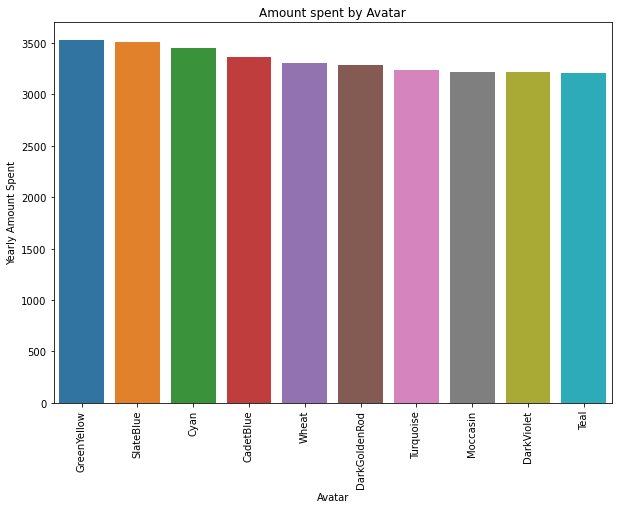

In [100]:
# bar chart visualization of the amount spent yearly by avatar

plt.figure(figsize=(10,7))
sns.barplot(x='Avatar', y='Yearly Amount Spent', data=avatar_perf.head(10))
plt.title('Amount spent by Avatar')
plt.xticks(rotation=90)
plt.show();

Based on the finding, seems that the Green Yellow avatar is the one that has the highest amount spent over the year, followed by Slate Blue and Cyan.

2. Relationship between Amount Spent and Time on Website


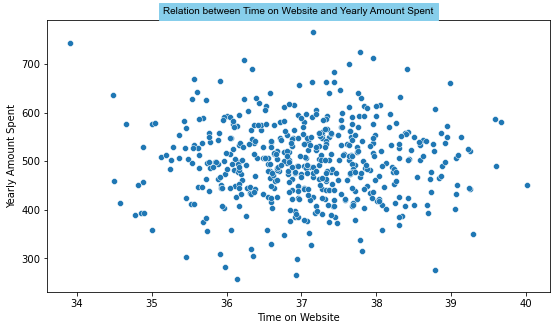

In [101]:
plt.figure(figsize=(9,5))
sns.scatterplot(data = df, x = 'Time on Website', y = 'Yearly Amount Spent')
plt.title('Relation between Time on Website and Yearly Amount Spent', fontsize = 13, font = 'Arial', backgroundcolor = 'skyblue')
plt.show()

3. Relationship between Lenght of Membership and Time on Website

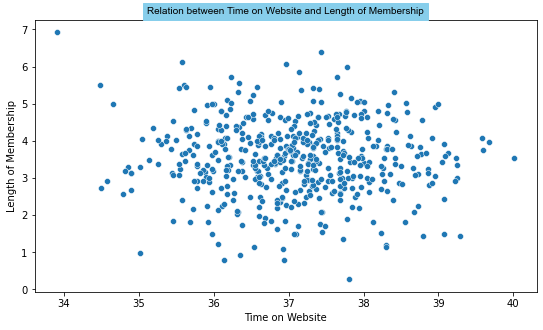

In [102]:
plt.figure(figsize=(9,5))
sns.scatterplot(data = df, x = 'Time on Website', y = 'Length of Membership')
plt.title('Relation between Time on Website and Length of Membership', fontsize = 13, font = 'Arial', backgroundcolor = 'skyblue')
plt.show()

4. Relationship between Amount Spent and Lenght of Membership


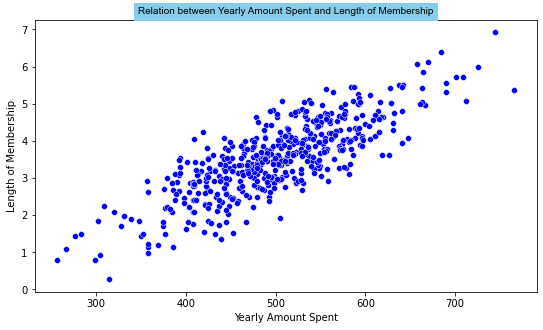

In [103]:
plt.figure(figsize = (9,5))
sns.scatterplot(data = df, x = 'Yearly Amount Spent', y = 'Length of Membership',color = 'b')
plt.title('Relation between Yearly Amount Spent and Length of Membership', fontsize = 13, font = 'Arial', backgroundcolor = 'skyblue')
plt.show()

By looking at the scatterplot we can see there is a sort of linear relationship between the two variables amount spent and lenght of membership. This means that the longer we have our customers in our membership the higher the amount they spend on our ecommerce.

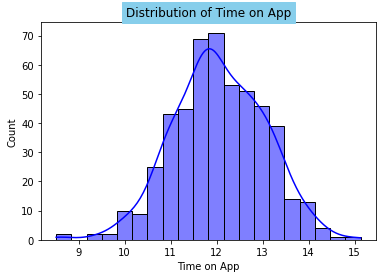

In [104]:
# Checking the distribution of Time on App

sns.histplot(data = df, x = 'Time on App', kde = True, color = 'b')
plt.title('Distribution of Time on App', backgroundcolor = 'skyblue')
plt.show()

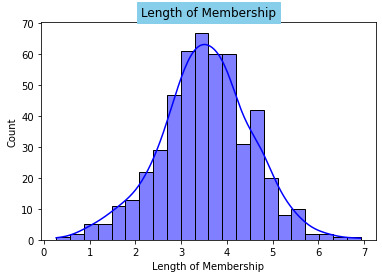

In [105]:
# Checking the distribution of Length of Membership

sns.histplot(data = df, x = 'Length of Membership', kde = True, color = 'b')
plt.title('Length of Membership', backgroundcolor = 'skyblue')
plt.show()

5. Correlation Matrix 

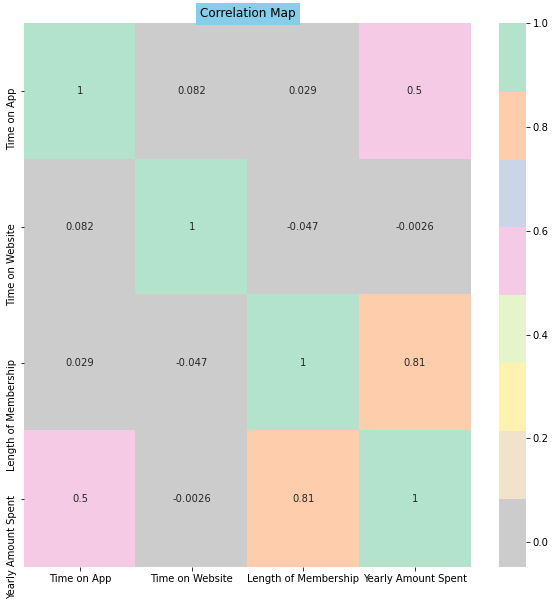

In [106]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True, cmap='Pastel2_r')
plt.title('Correlation Map', backgroundcolor = 'skyblue')
plt.show();

We can see a positive correlation of time spent on app with the yearly amount spent as well as lenght of membership. The more we can increase these two independent variables, the more we can increase the revenues due to the increase in yearly amount spent.

Extracting the State info from address column and anonymize the email data

In [107]:
# Extracting the State from address

df['State'] = df['Address'].str.extract(r'\b([A-Za-z]{2})\b')

In [108]:
# Making email list numbers

df['ID'] = ['ID_' + str(random.randint(10000, 99999)) for _ in df['Email']]
df.head()

,Email,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,State,ID
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95,MI,ID_26019
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20,CA,ID_27232
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55,DC,ID_60612
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85,OH,ID_94053
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41,PR,ID_61696


In [109]:
# Drop the email column

df.drop(columns=['Address', 'Email'], axis=1, inplace=True)

6. What is the state where customers spent more time on website and app?

In [110]:
# Sort values by Time on App

df.groupby('State')['Time on App', 'Time on Website'].sum().reset_index().sort_values(by='Time on App', ascending=False)

,State,Time on App,Time on Website
1,AE,218.28,667.55
0,AA,209.63,633.52
33,MO,156.27,486.33
52,SC,154.08,481.93
59,VT,147.64,443.80
...,...,...,...
10,CT,58.36,180.78
60,WA,50.20,148.05
20,ID,36.38,110.11
18,Ho,11.24,37.68


In [111]:
# Sort values by Time on Website

df.groupby('State')['Time on App', 'Time on Website'].sum().reset_index().sort_values(by='Time on Website', ascending=False)

,State,Time on App,Time on Website
1,AE,218.28,667.55
0,AA,209.63,633.52
33,MO,156.27,486.33
52,SC,154.08,481.93
47,OR,141.88,448.47
...,...,...,...
10,CT,58.36,180.78
60,WA,50.20,148.05
20,ID,36.38,110.11
18,Ho,11.24,37.68


### Model Creation - K-Means Clustering

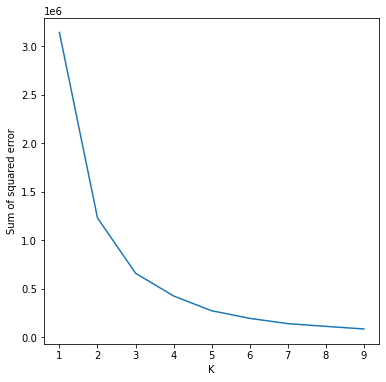

In [112]:
#Now we need to find the k-clusters. Let's use the Elbow method to find them

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Length of Membership','Yearly Amount Spent']])
    sse.append(km.inertia_)

fig, axes = plt.subplots(1,1,figsize=(6,6))
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

- Clusters can be identified around 3 or 4, let's dig deeper

In [113]:
for i in range(2, 10):
    km = KMeans(n_clusters=i, max_iter=100, random_state=42)
    km.fit(df[['Length of Membership', 'Yearly Amount Spent']])
    score = silhouette_score(df[['Length of Membership', 'Yearly Amount Spent']], km.labels_)
    print('For cluster: {}, the silhouette score is: {:.4f}'.format(i, score))


For cluster: 2, the silhouette score is: 0.5354
For cluster: 3, the silhouette score is: 0.5272
For cluster: 4, the silhouette score is: 0.5250
For cluster: 5, the silhouette score is: 0.5466
For cluster: 6, the silhouette score is: 0.5392
For cluster: 7, the silhouette score is: 0.5396
For cluster: 8, the silhouette score is: 0.5345
For cluster: 9, the silhouette score is: 0.5399


The silhouette score is a metric used to calculate the goodness of a clustering technique, such as K-means. It measures how well-separated clusters are. The silhouette score ranges from -1 to 1:

- A score close to +1 indicates that the data point is far away from the neighboring clusters.
- A score of 0 indicates that the data point is on or very close to the decision boundary between two neighboring clusters.
- A score close to -1 indicates that the data point may have been assigned to the wrong cluster.

The silhouette scores are relatively high, and they do not differ significantly among the tested cluster numbers. This suggests that the data might have well-defined clusters, and the silhouette scores support the clustering quality for a variety of cluster numbers.

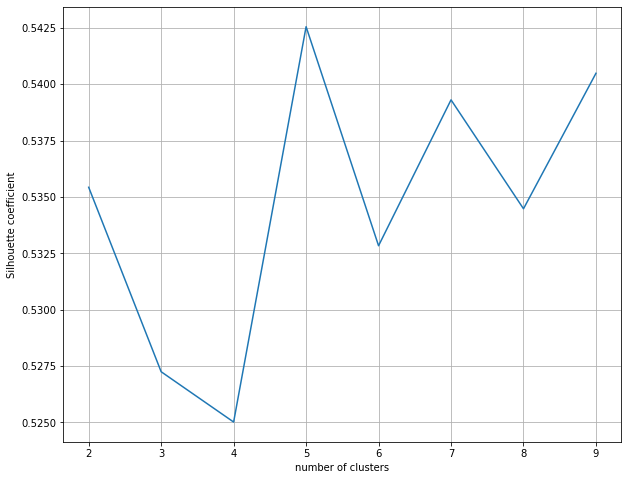

In [114]:
silhouette_coefficients = []
for i in range(2,10):
    km = KMeans(n_clusters=i, max_iter=100)
    km.fit(df[['Length of Membership', 'Yearly Amount Spent']])
    score = silhouette_score(df[['Length of Membership', 'Yearly Amount Spent']], km.labels_)
    silhouette_coefficients.append(score)

plt.figure(figsize=(10,8))
plt.plot(range(2,10), silhouette_coefficients)
plt.xticks(range(2,10))
plt.xlabel('number of clusters')
plt.ylabel('Silhouette coefficient')
plt.grid()
plt.show();

In [115]:
for i in range(2, 10):
    km = KMeans(n_clusters=i, max_iter=100, random_state=42)
    km.fit(df[['Length of Membership', 'Yearly Amount Spent']])
    silhouette = silhouette_score(df[['Length of Membership', 'Yearly Amount Spent']], km.labels_)
    davies_bouldin = davies_bouldin_score(df[['Length of Membership', 'Yearly Amount Spent']], km.labels_)
    print(f"For cluster: {i}, Silhouette Score: {silhouette:.4f}, Davies-Bouldin Index: {davies_bouldin:.4f}")


For cluster: 2, Silhouette Score: 0.5354, Davies-Bouldin Index: 0.6239
For cluster: 3, Silhouette Score: 0.5272, Davies-Bouldin Index: 0.5792
For cluster: 4, Silhouette Score: 0.5250, Davies-Bouldin Index: 0.5601
For cluster: 5, Silhouette Score: 0.5466, Davies-Bouldin Index: 0.5218
For cluster: 6, Silhouette Score: 0.5392, Davies-Bouldin Index: 0.5246
For cluster: 7, Silhouette Score: 0.5396, Davies-Bouldin Index: 0.5132
For cluster: 8, Silhouette Score: 0.5345, Davies-Bouldin Index: 0.5115
For cluster: 9, Silhouette Score: 0.5399, Davies-Bouldin Index: 0.5004


The Davies-Bouldin index is another clustering validation metric that measures the average similarity ratio of each cluster with its most similar cluster. A lower Davies-Bouldin index indicates better clustering.

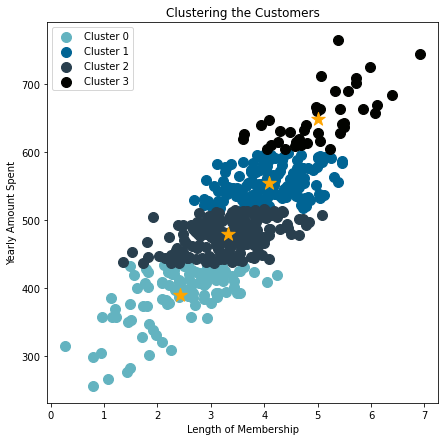

In [116]:
#Let's try Kmean method with 4 clusters
km=KMeans(n_clusters=4)
points=df[['Length of Membership','Yearly Amount Spent']].to_numpy()
y_km=km.fit_predict(points)

fig, axes = plt.subplots(1,1,figsize=(7,7))
Cluster_0=plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='#63b3c0')
Cluster_1=plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='#006494')
Cluster_2=plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='#293f4e')
Cluster_3=plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='#020300')


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='orange',marker='*',label='centroid',s=200)
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.title('Clustering the Customers')
plt.legend([Cluster_0,Cluster_1,Cluster_2,Cluster_3],['Cluster 0','Cluster 1','Cluster 2','Cluster 3']);

In [117]:
df['Cluster Label'] = km.fit_predict(df[['Length of Membership', 'Yearly Amount Spent']])

In [118]:
cluster_summary = df.groupby('Cluster Label').agg({'Yearly Amount Spent' : 'mean',
                                'Length of Membership': 'mean',
                                'Avatar':lambda x: x.mode().iloc[0],
                                'Time on Website': 'mean',
                                'Time on App': 'mean',}).reset_index().sort_values(by='Yearly Amount Spent', ascending=False).round(2)

In [119]:
cluster_summary

,Cluster Label,Yearly Amount Spent,Length of Membership,Avatar,Time on Website,Time on App
0,0,649.01,5.01,DarkGoldenRod,36.98,13.16
3,3,554.14,4.10,BlueViolet,37.11,12.32
1,1,478.99,3.33,MediumSpringGreen,37.03,11.98
2,2,389.85,2.43,Navy,37.07,11.31


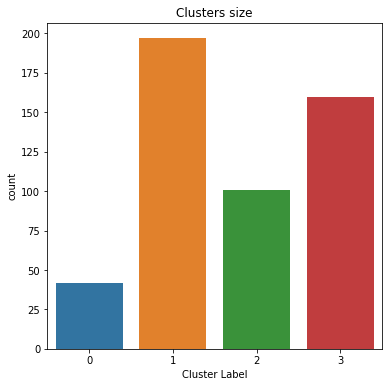

In [120]:
plt.figure(figsize=(6,6))
sns.countplot(x='Cluster Label', data=df)
plt.title('Clusters size')
plt.show();

2. What is the cluster that spends the most during the year?

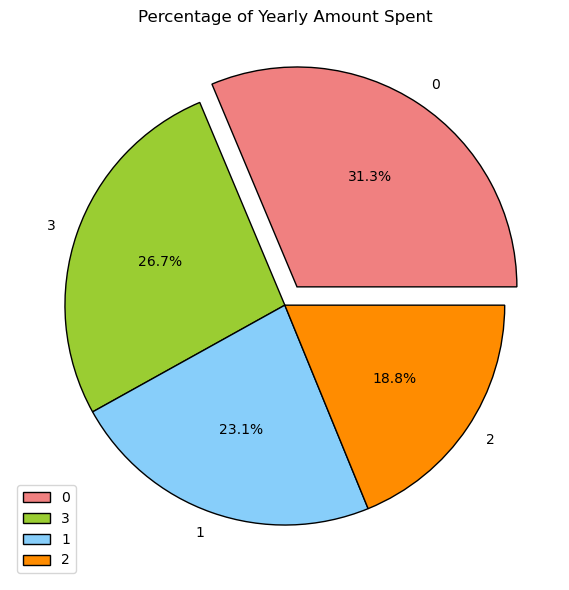

In [121]:

# Explode a slice (e.g., the one with the maximum results)
max_results_index = cluster_summary['Yearly Amount Spent'].idxmax()
explode = [0.1 if idx == max_results_index else 0 for idx in cluster_summary.index]

# Plotting the pie chart
plt.style.use("default")
plt.figure(figsize=(8, 6))
plt.pie(cluster_summary['Yearly Amount Spent'], labels=cluster_summary['Cluster Label'],
        colors=["lightcoral", "yellowgreen", "lightskyblue", "darkorange"],
        wedgeprops={"edgecolor": "black"},
        autopct="%1.1f%%", explode=explode)
plt.title('Percentage of Yearly Amount Spent')
plt.legend()
plt.tight_layout()
plt.show()

3. What is the cluster that spends the most time in our ecommerce?

In [122]:
df.groupby('Cluster Label').agg({
                                'Time on Website': 'mean',
                                'Time on App': 'mean',}).reset_index().sort_values(by='Time on Website', ascending=False).round(2)

,Cluster Label,Time on Website,Time on App
3,3,37.11,12.32
2,2,37.07,11.31
1,1,37.03,11.98
0,0,36.98,13.16


4. What is the cluster of customers that spend the most in our e-commerce?

In [123]:
df.groupby('Cluster Label').agg({
                                'Yearly Amount Spent': 'mean',
                                'Length of Membership': 'mean',}).reset_index().sort_values(by='Yearly Amount Spent', ascending=False).round(2)

,Cluster Label,Yearly Amount Spent,Length of Membership
0,0,649.01,5.01
3,3,554.14,4.10
1,1,478.99,3.33
2,2,389.85,2.43


Customer Categories

In [124]:
# Classify clusters based on conditions
cluster_summary['Customer Category'] = 'Need Attention'  # Default category

# Iterate through each row and update 'Customer Category' based on conditions
for index, row in cluster_summary.iterrows():
    if row['Cluster Label'] == 3:
        cluster_summary.at[index, 'Customer Category'] = 'Top Customers'
    elif row['Cluster Label'] == 0:
        cluster_summary.at[index, 'Customer Category'] = 'Loyal Customers'
    elif row['Cluster Label'] == 2:
        cluster_summary.at[index, 'Customer Category'] = 'Need Attention'
    elif row['Cluster Label'] == 1:
        cluster_summary.at[index, 'Customer Category'] = 'Immediate Attention'

In [125]:
cluster_summary

,Cluster Label,Yearly Amount Spent,Length of Membership,Avatar,Time on Website,Time on App,Customer Category
0,0,649.01,5.01,DarkGoldenRod,36.98,13.16,Loyal Customers
3,3,554.14,4.10,BlueViolet,37.11,12.32,Top Customers
1,1,478.99,3.33,MediumSpringGreen,37.03,11.98,Immediate Attention
2,2,389.85,2.43,Navy,37.07,11.31,Need Attention


# STEP 6: ACT

In this part we summarize the key insights we have found and we elaborate them into an actionable plan

Here, we revisit our business questions and share with you our high-level business recommendations.
 
**1. What are the main findings for our e-commerce?**

* The majority of yearly amount spent comes from those customers that have a longer relationship with us.

* Cluster 3 is the smallest cluster but it's also the one that represents our top customers since they have a higher yearly amount spent and also a higher lenght of membership. They are followed by our loyal customers since they spend higher time on our website and have a lower spend on our ecommerce.

**2. What Key action can we take from this?**

* Loyalty programs for the cluster 3 and 0 are essential to keep the relationship in place, we can use discounts, free samples, special products tailored for them. It would be nice to make further analysis on which channel has brought them to discover us and be our clients. using CRM systems and marketing automation is a great way to engage with them and use this "free" traffic to sell more products.
On the other hand clusters 2 and 1 are the most critical. They spend quite a lot of time on our ecommerce but they do not have a higher spend and also theyr relationship with us is limited. Some key actions is to trying understanding them and understand if they are customers that are attracted just by promotions and they leave us. So here special promotions or retargeting adv could be a first step to understand this point.


***

